# 3 Exploratory Data Analysis

### 3.1 Importing Libraries and Data

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [3]:
filename = '../Step 2 - Data Wrangling/FlareDataClean.csv'
df = pd.read_csv(filename)

df.head()

,Zurich_Class,Largest_Spot_Size,Spot_Distribution,Activity,Evolution,Prev_24h_Activity,Historically_Complex,Become_Historically_Complex,Area,Area_Of_Largest,C_Class_Flares,M_Class_Flares,X_Class_Flares
0,8,4,1,1,3,1,1,1,1,1,0,0,0
1,4,2,2,1,3,1,1,2,1,1,0,0,0
2,3,3,2,1,3,1,1,2,1,1,0,0,0
3,8,2,1,1,2,1,1,1,1,1,0,0,0
4,8,3,1,1,1,1,1,2,1,1,0,0,0


### 3.2 Description of Data

In [4]:
df.describe()

,Zurich_Class,Largest_Spot_Size,Spot_Distribution,Activity,Evolution,Prev_24h_Activity,Historically_Complex,Become_Historically_Complex,Area,Area_Of_Largest,C_Class_Flares,M_Class_Flares,X_Class_Flares
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0,1066.000000,1066.000000,1066.000000
mean,4.938086,2.906191,1.964353,1.153846,2.401501,1.059099,1.404315,1.875235,1.025328,1.0,0.300188,0.046904,0.005629
std,2.256740,1.197266,0.806456,0.360971,0.620584,0.320324,0.490989,0.330608,0.157194,0.0,0.835784,0.302811,0.086487
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000
50%,4.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000
75%,8.000000,4.000000,2.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000
max,8.000000,6.000000,4.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.0,8.000000,5.000000,2.000000


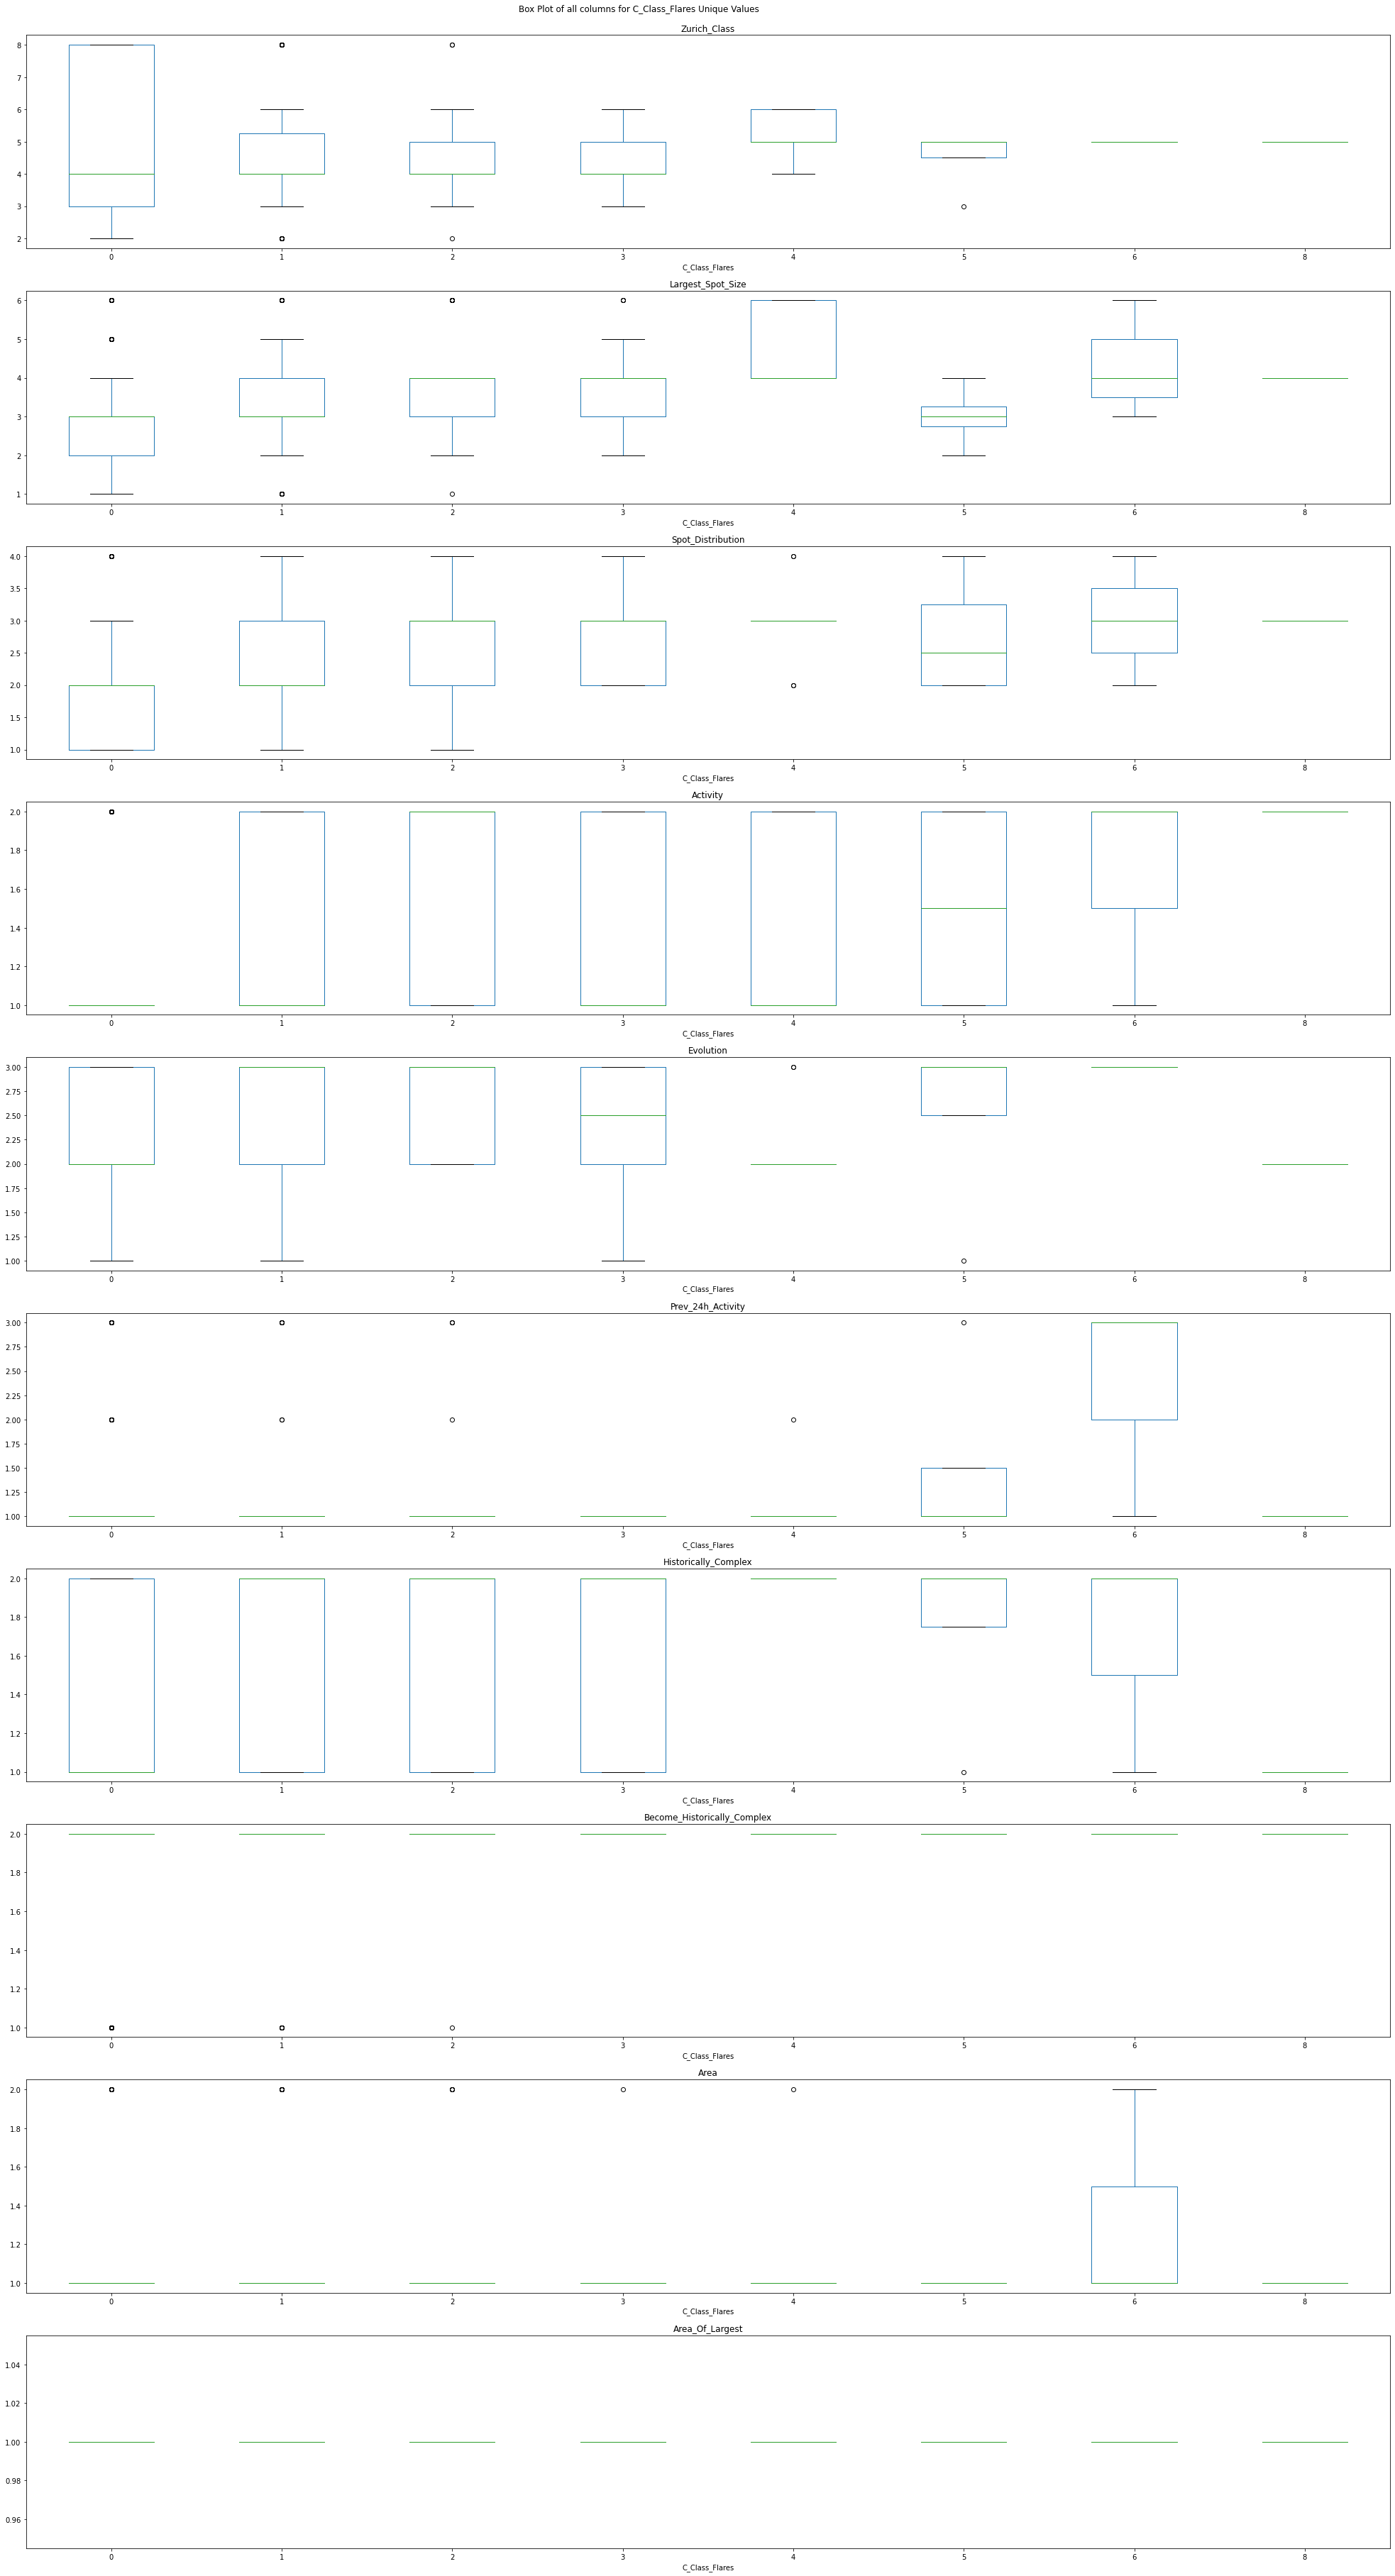

In [53]:
fig, axs = plt.subplots(10,1)
columns = df.drop(['C_Class_Flares','M_Class_Flares','X_Class_Flares'],axis=1).columns

for i in range(0,10):
    df.boxplot([columns[i]],by = 'C_Class_Flares',ax=axs[i],grid = False)
    axs[i].title.set_text(columns[i])

plt.subplots_adjust(top=0.97, right=0.99)
fig.suptitle('Box Plot of all columns for C_Class_Flares Unique Values')
fig.set_figheight(60)
fig.set_figwidth(30)

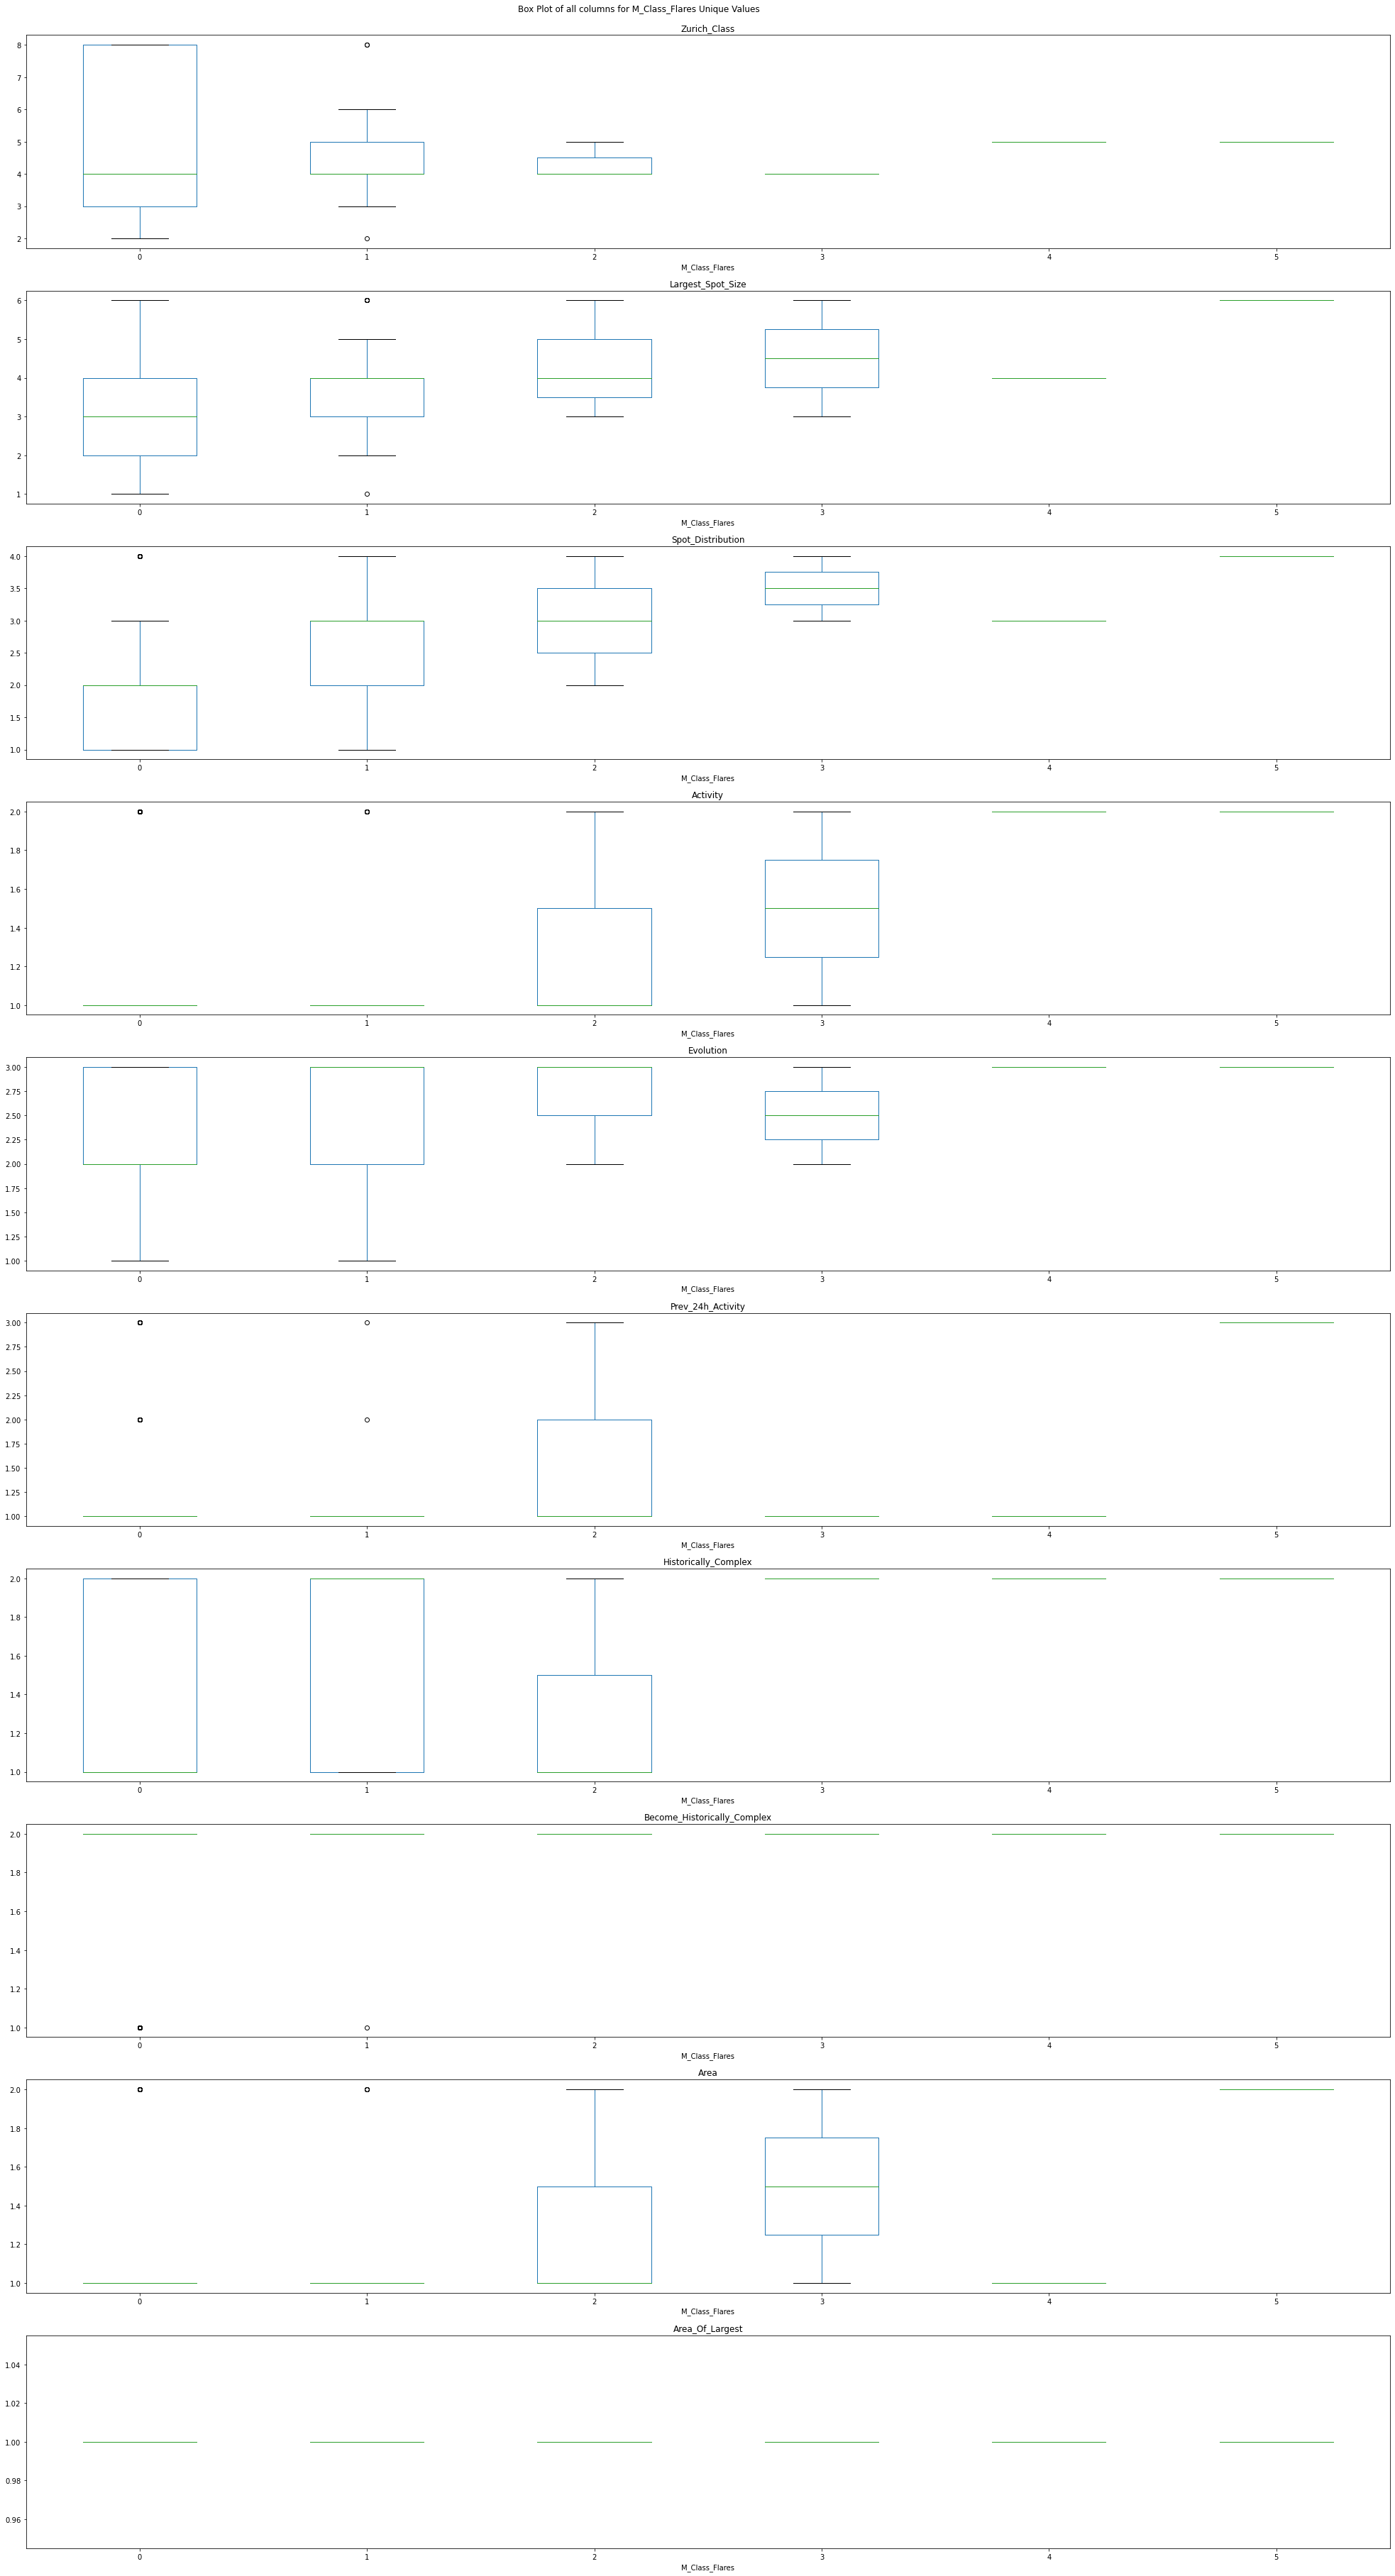

In [55]:
fig, axs = plt.subplots(10,1)
columns = df.drop(['C_Class_Flares','M_Class_Flares','X_Class_Flares'],axis=1).columns

for i in range(0,10):
    df.boxplot([columns[i]],by = 'M_Class_Flares',ax=axs[i],grid = False)
    axs[i].title.set_text(columns[i])

plt.subplots_adjust(top=0.97, right=0.99)
fig.suptitle('Box Plot of all columns for M_Class_Flares Unique Values')
fig.set_figheight(60)
fig.set_figwidth(30)

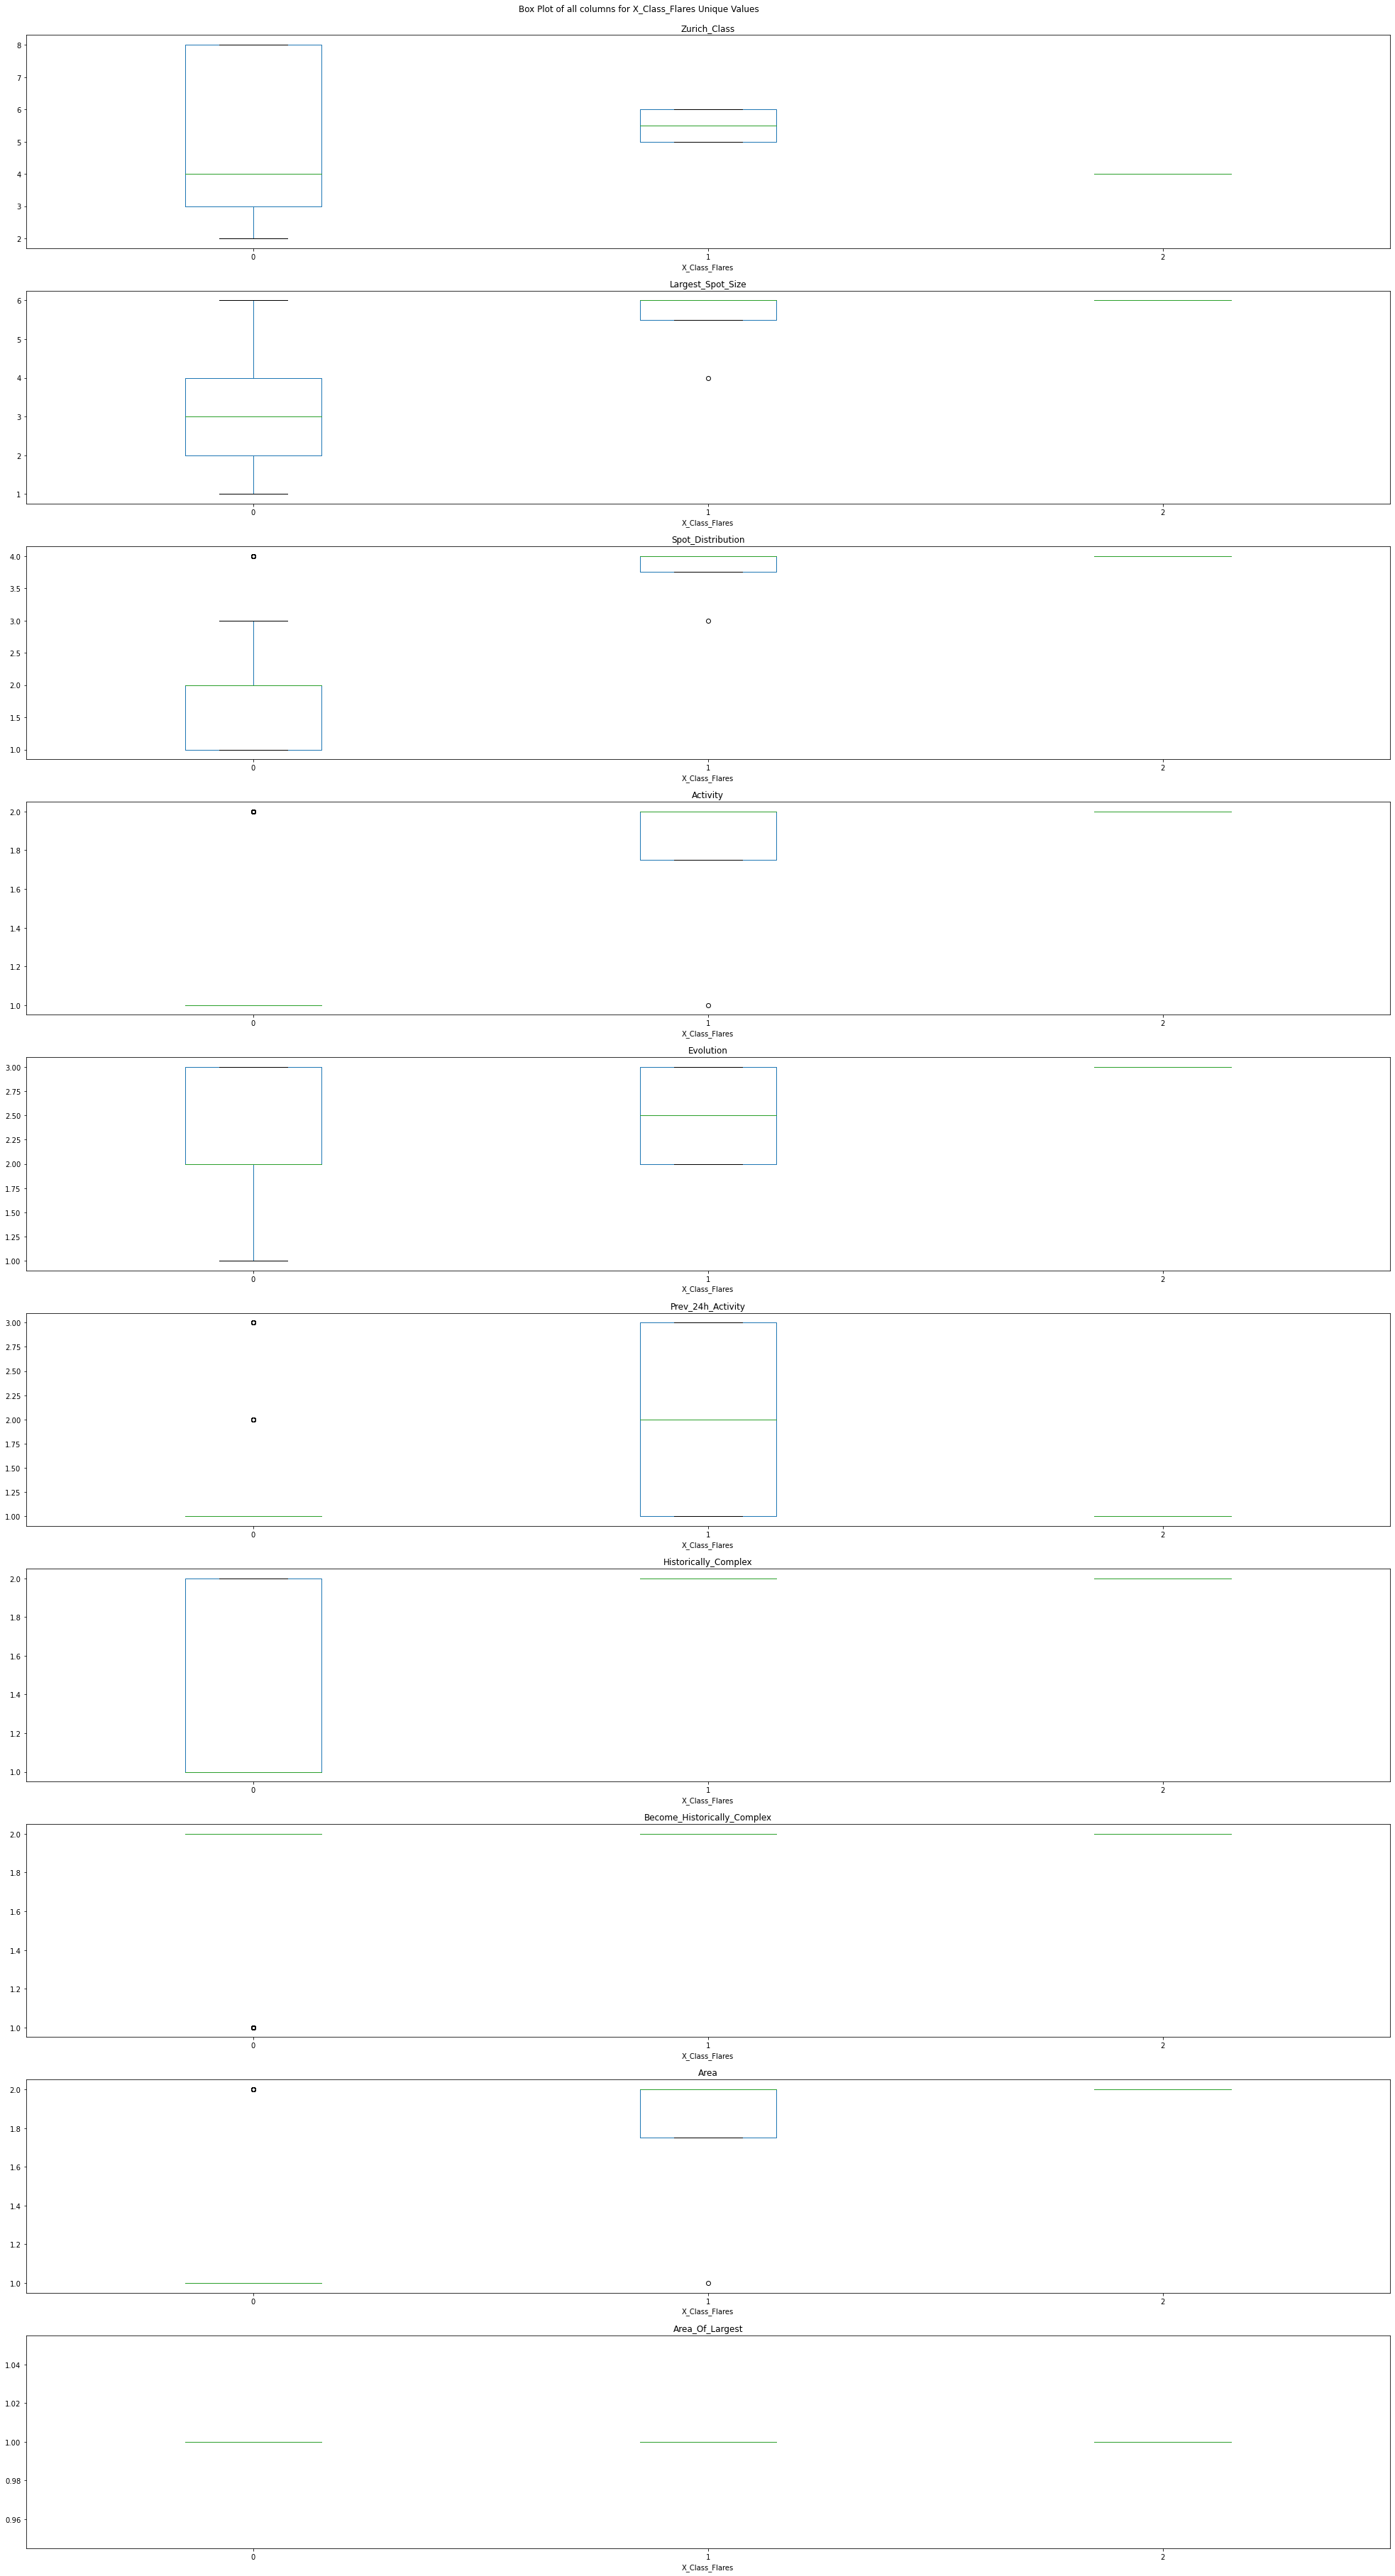

In [54]:
fig, axs = plt.subplots(10,1)
columns = df.drop(['C_Class_Flares','M_Class_Flares','X_Class_Flares'],axis=1).columns

for i in range(0,10):
    df.boxplot([columns[i]],by = 'X_Class_Flares',ax=axs[i],grid = False)
    axs[i].title.set_text(columns[i])

plt.subplots_adjust(top=0.97, right=0.99)
fig.suptitle('Box Plot of all columns for X_Class_Flares Unique Values')
fig.set_figheight(60)
fig.set_figwidth(30)

Box Plots have been created for each target variable and their unique values. This is to compare the unique values in each class and see what features tend to occur more for certain values. The first three features(Zurich_Class, Largest_Spot_Size, Spot_Distribution) give us some variety across the unique outputs and it appears this may be the strongest as we see some differences between the values. The last column(Area_Of_Largest) and Become_Historically_Complex seem to give us no variety so it's hard to see any significant patterns there. While nothing is noticable, it can still be important to the model when paired with other columns. This box plot is only showing us differences we can see within a single column. Pairing columns together may allow us to find more patterns and that's something our models can find.

### 3.4 Correlation

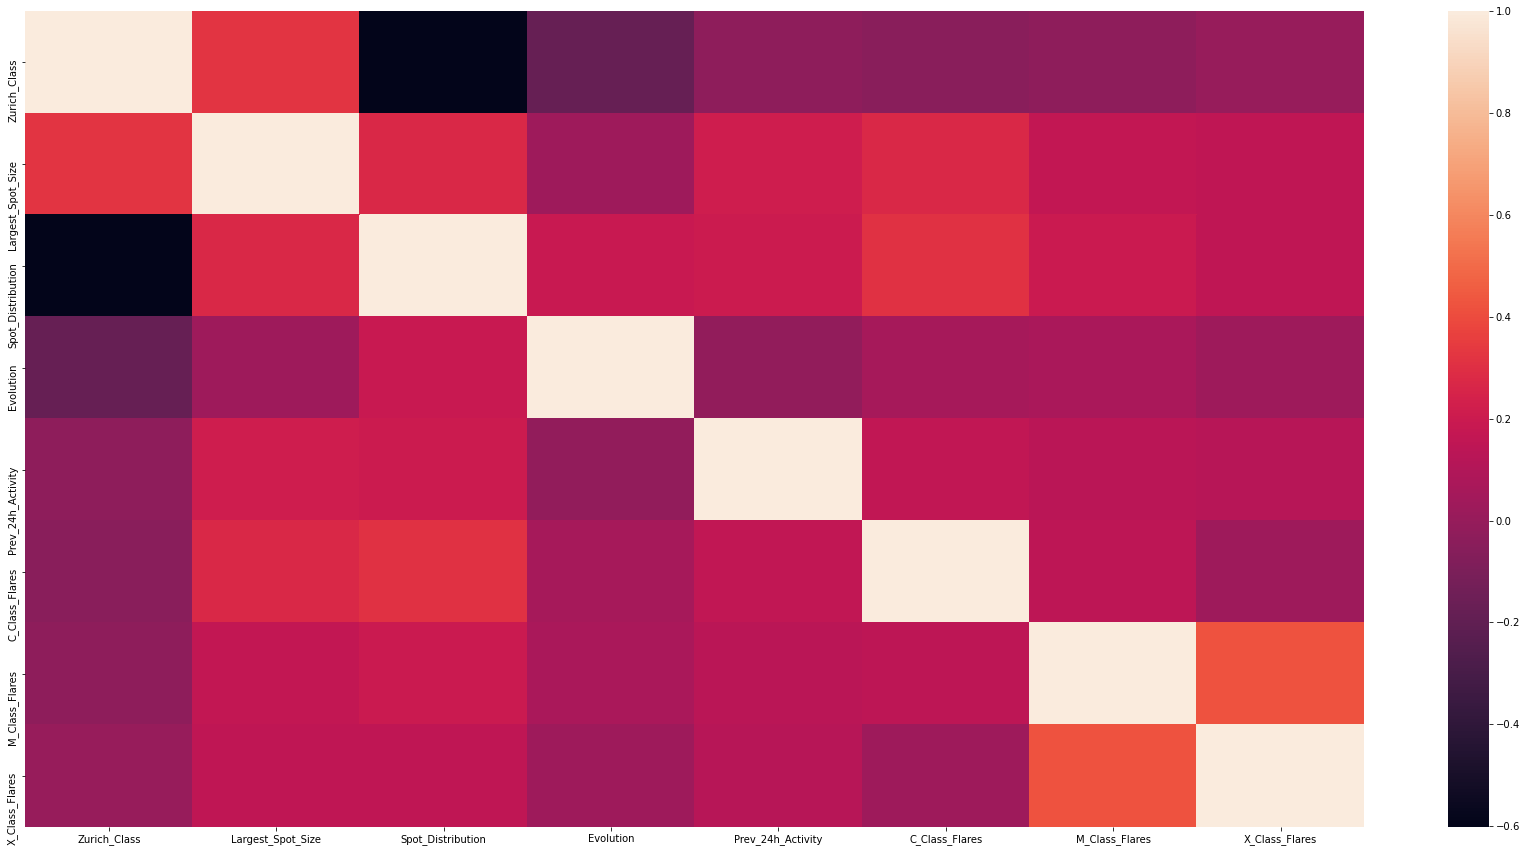

In [70]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(30)

sns.heatmap(df.drop(['Area_Of_Largest','Activity','Historically_Complex','Become_Historically_Complex','Area_Of_Largest','Area'],axis=1).corr(),ax=ax)
plt.show()

We remove the binary features and calculate the correlation on the remaining columns. While the remaining features are still all categorical, we can get some sense of linear relatinoships between columns. Some interesting things that stick out are Largest_Spot_Size and Spot_Distribution for the C_Class Flares. Also, we see a strong linear correlation between M_Class_Flares and X_Class_Flares, although both of those are our target variables. Maybe we can use each target variable somehow to get a better value for the other.

### 3.4 Scatter Plot

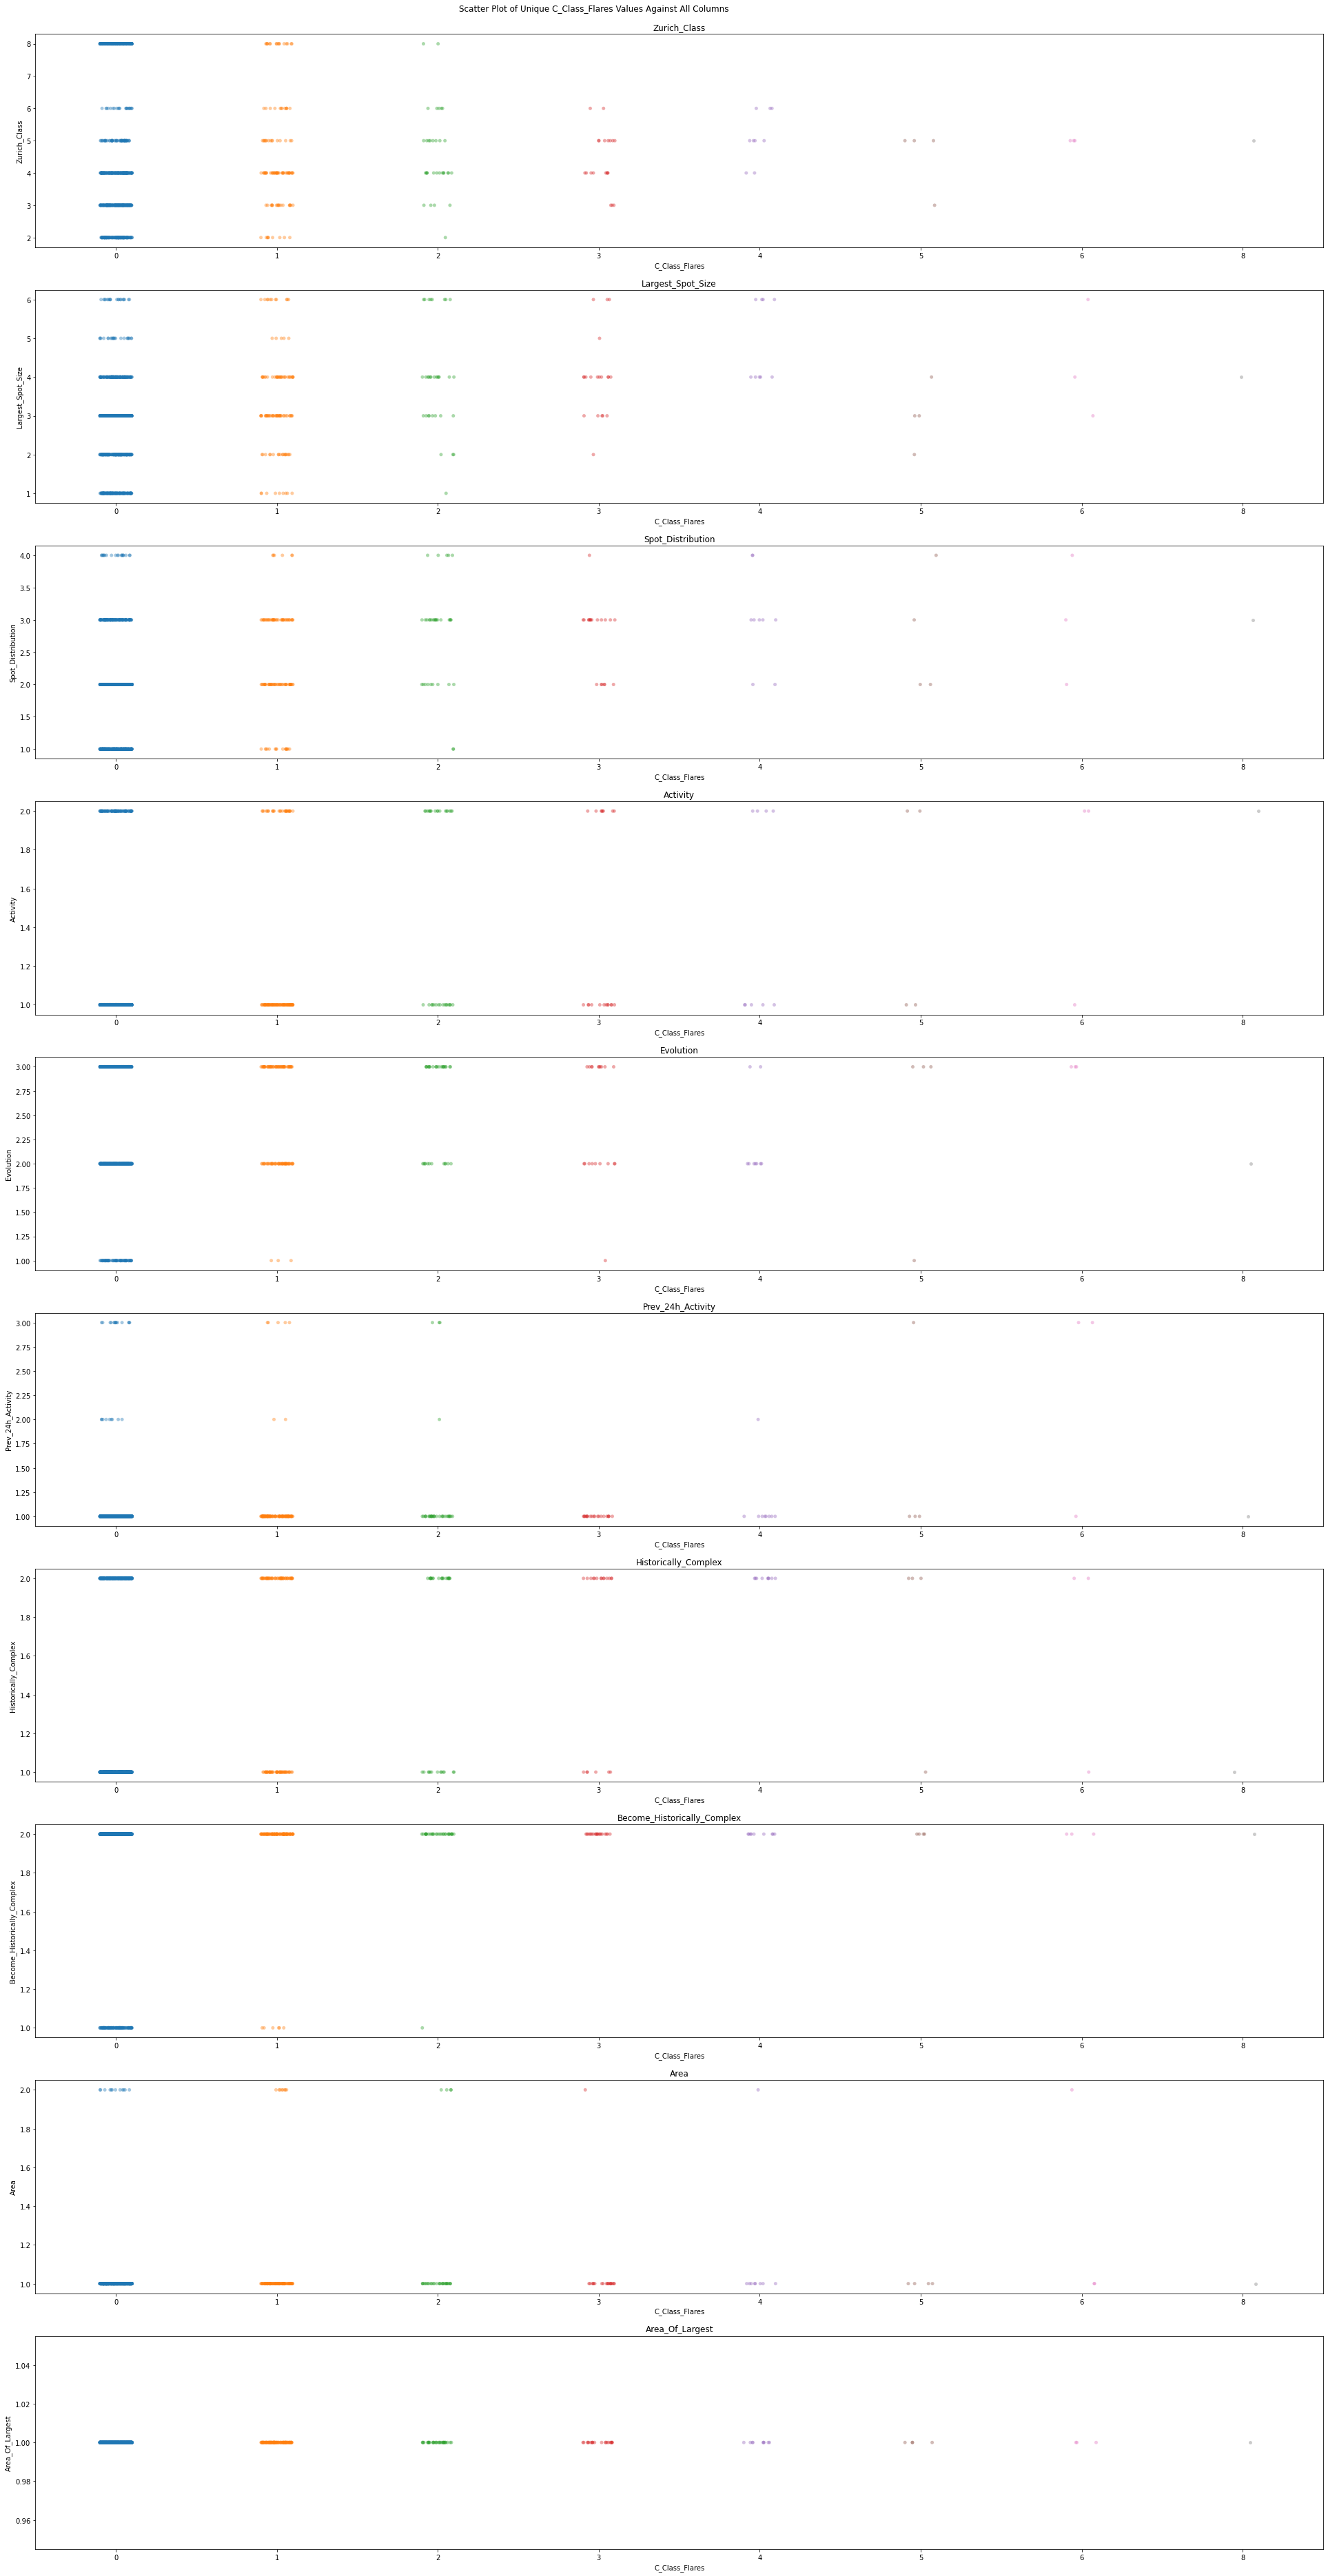

In [86]:
fig, axs = plt.subplots(10,1)
counter = 0

for i in df.drop(['C_Class_Flares','M_Class_Flares','X_Class_Flares'],axis=1).columns:    
        sns.stripplot('C_Class_Flares',i,alpha=0.4, data = df,ax = axs[counter],jitter = True)
        axs[counter].title.set_text(i)
        counter += 1

plt.subplots_adjust(top=0.97, right=0.99)
fig.suptitle('Scatter Plot of Unique C_Class_Flares Values Against All Columns')
fig.set_figheight(60)
fig.set_figwidth(30)

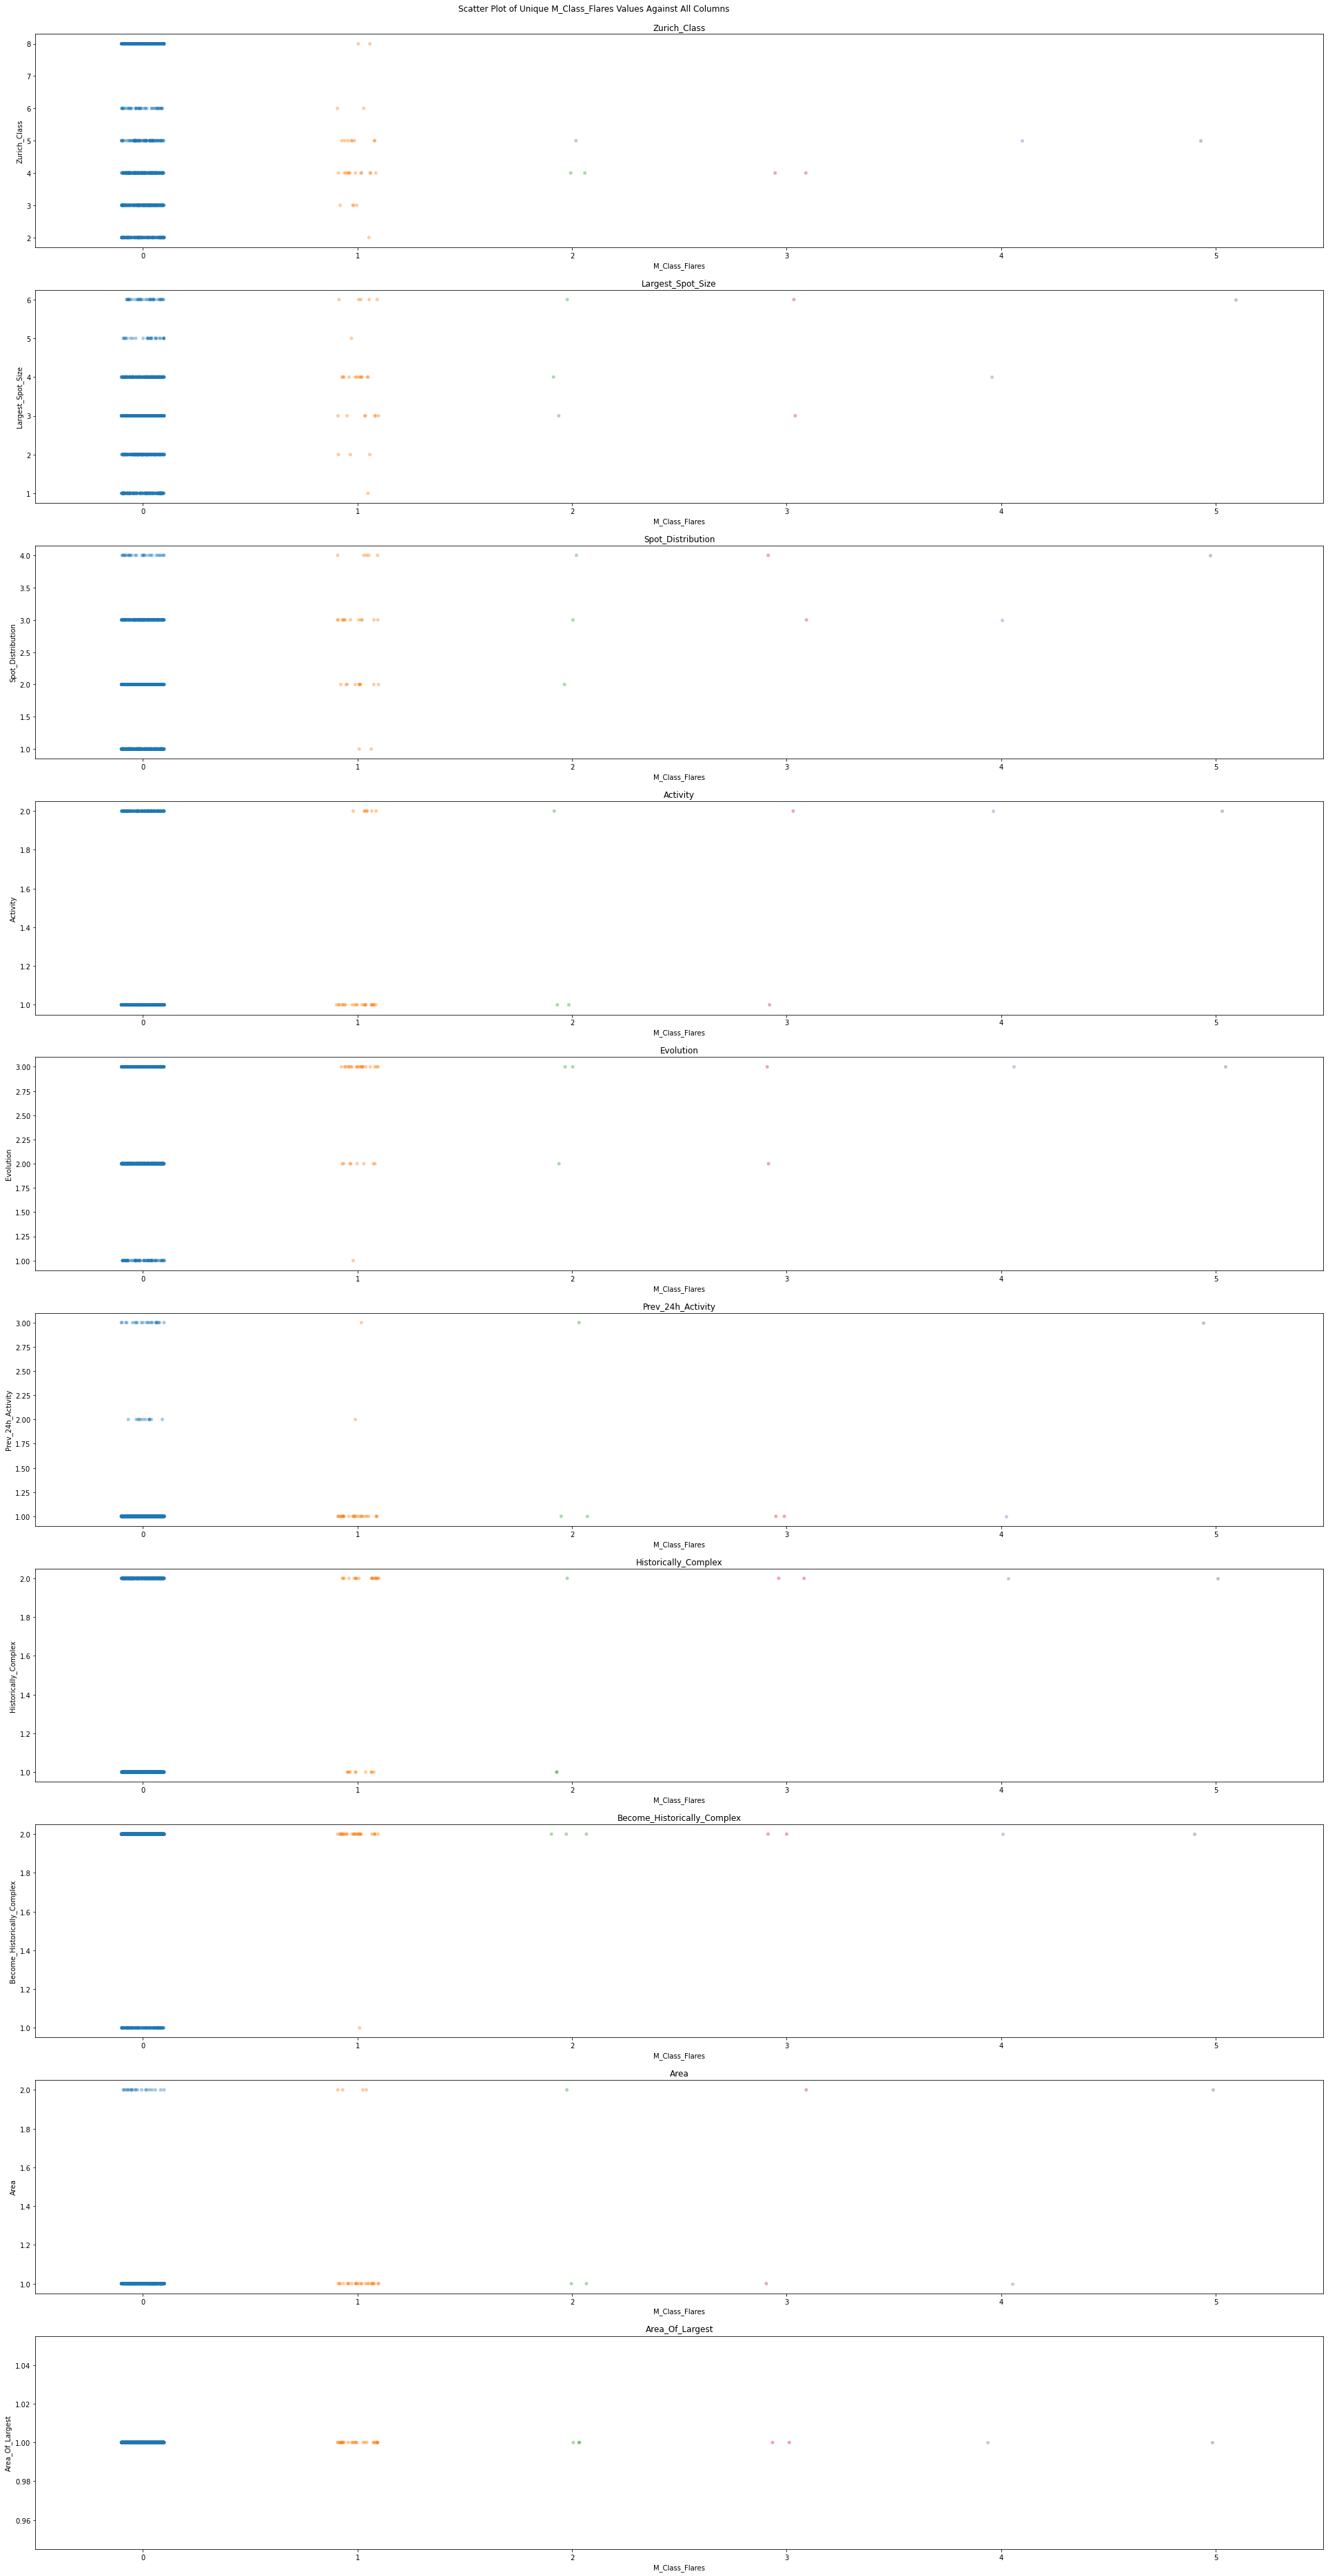

In [84]:
fig, axs = plt.subplots(10,1)
counter = 0

for i in df.drop(['C_Class_Flares','M_Class_Flares','X_Class_Flares'],axis=1).columns:    
        sns.stripplot('M_Class_Flares',i,alpha=0.4, data = df,ax = axs[counter],jitter = True)
        axs[counter].title.set_text(i)
        counter += 1

plt.subplots_adjust(top=0.97, right=0.99)
fig.suptitle('Scatter Plot of Unique M_Class_Flares Values Against All Columns')
fig.set_figheight(60)
fig.set_figwidth(30)

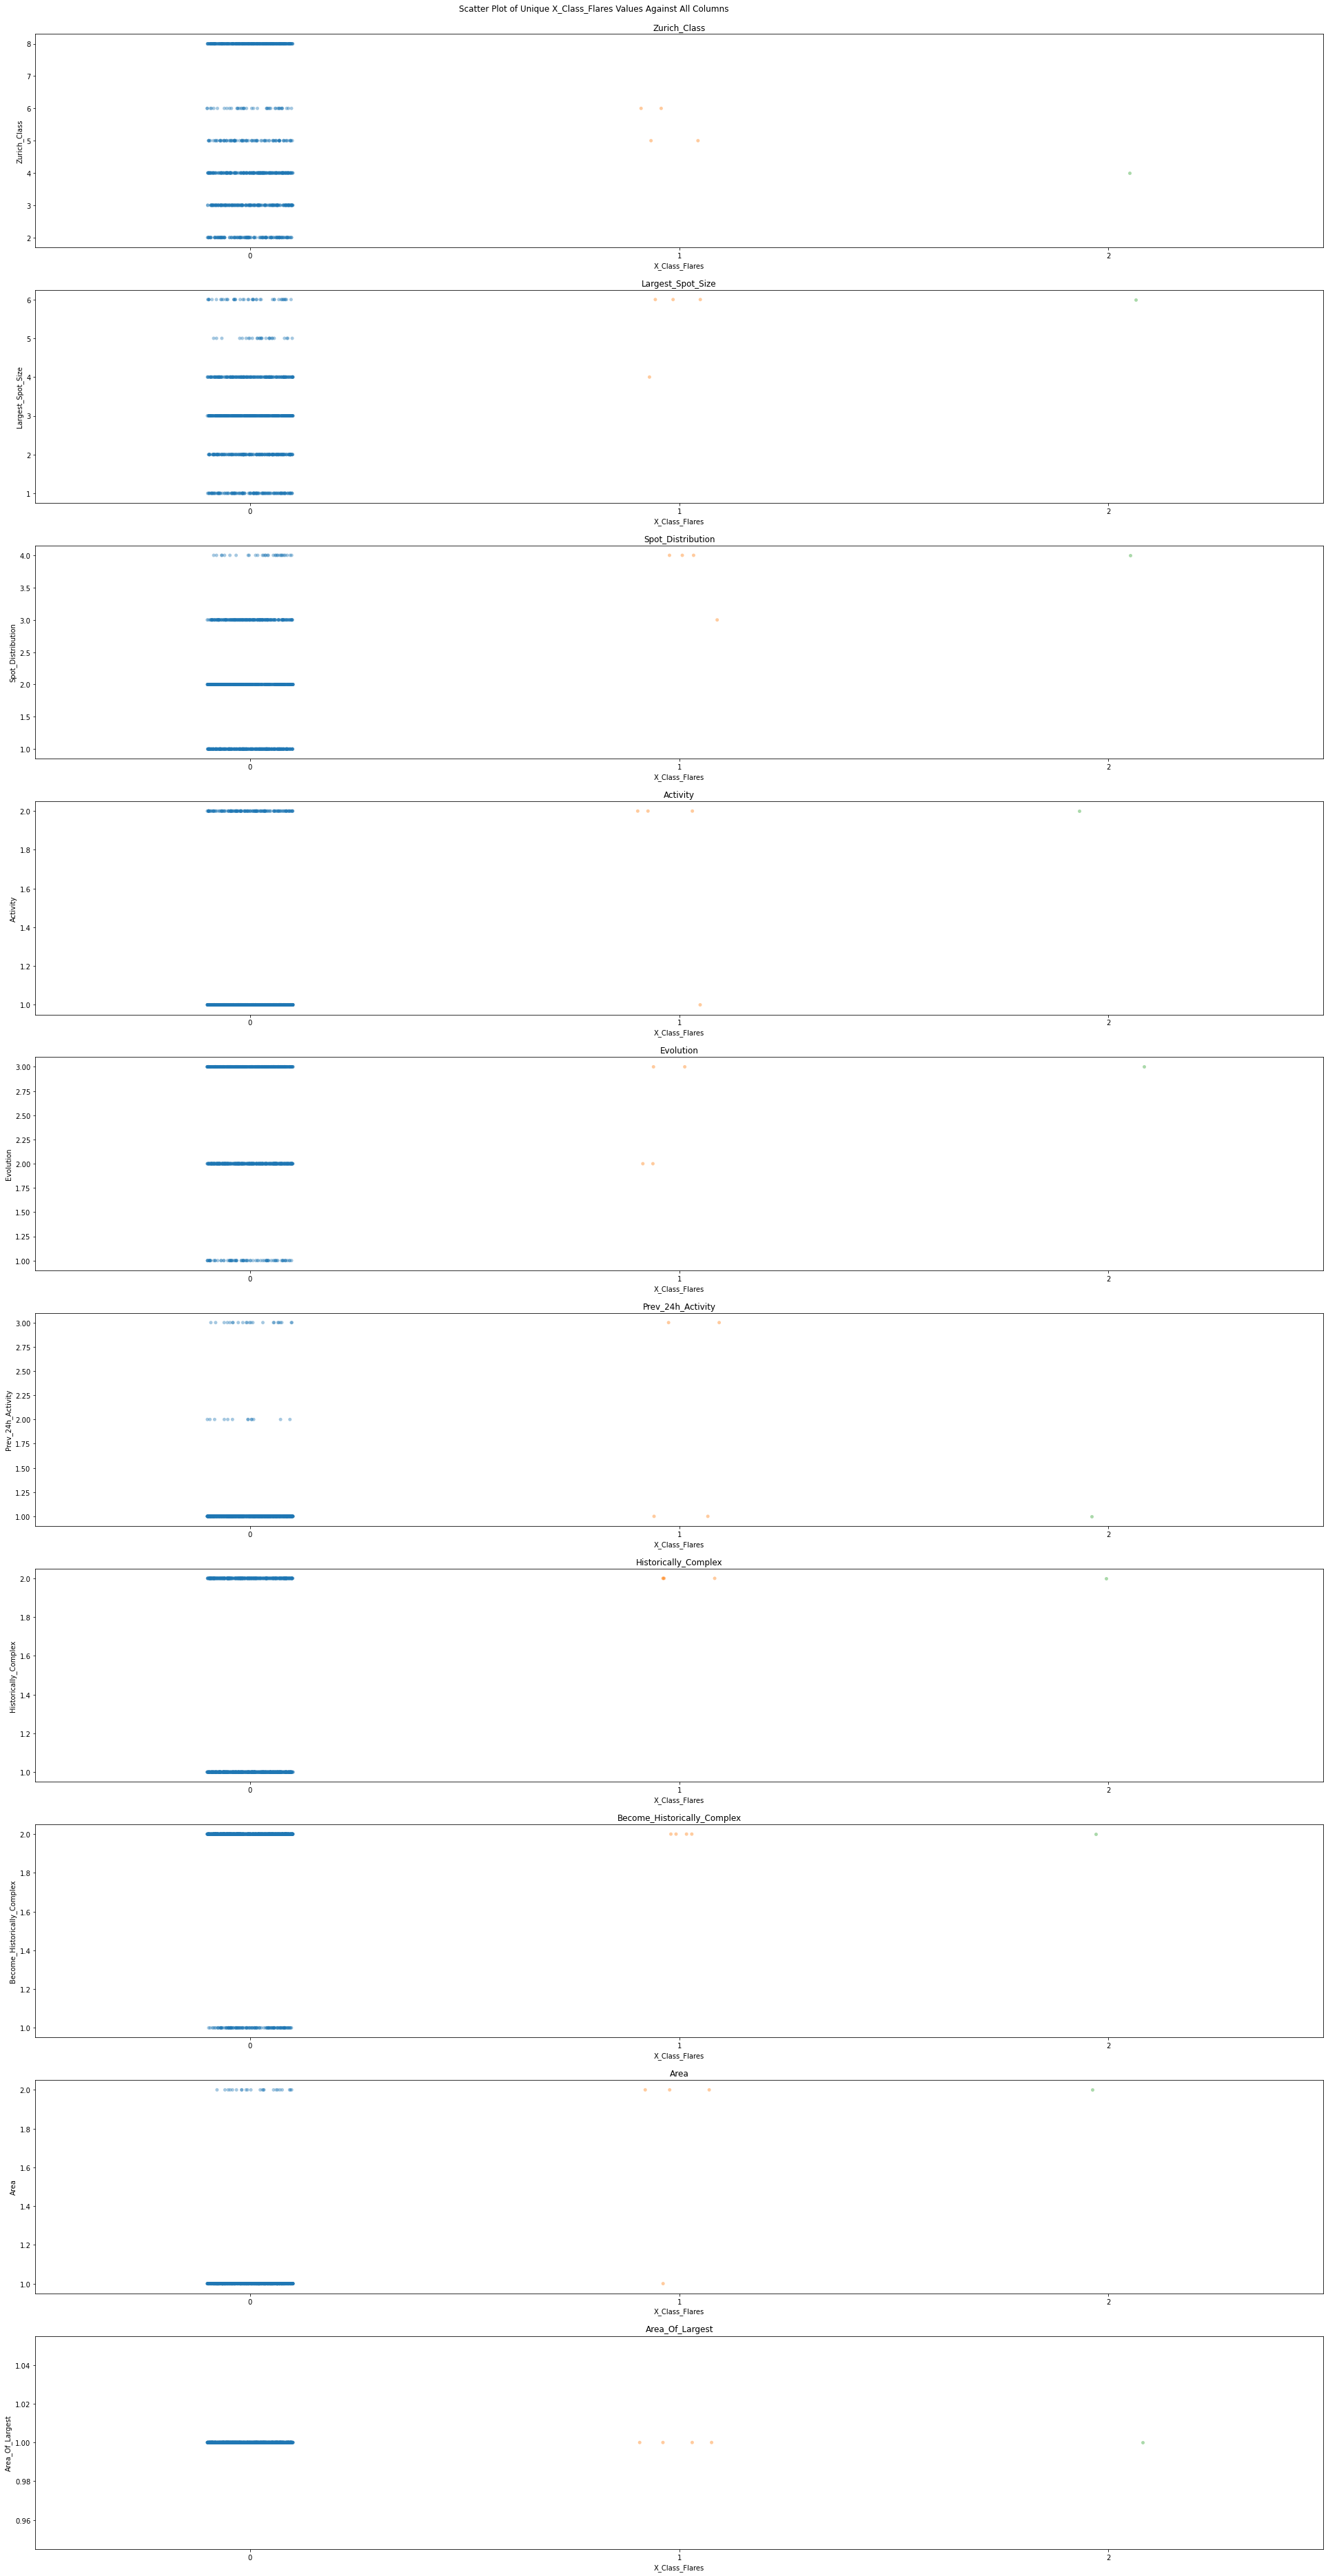

In [88]:
fig, axs = plt.subplots(10,1)
counter = 0

for i in df.drop(['C_Class_Flares','M_Class_Flares','X_Class_Flares'],axis=1).columns:    
        sns.stripplot('X_Class_Flares',i,alpha=0.4, data = df,ax = axs[counter],jitter = True)
        axs[counter].title.set_text(i)
        counter += 1

plt.subplots_adjust(top=0.97, right=0.99)
fig.suptitle('Scatter Plot of Unique X_Class_Flares Values Against All Columns')
fig.set_figheight(60)
fig.set_figwidth(30)

One thing that we seem to be seeing is a lot of our target values tend to be populated with a lot of 0's. Especially for our X_Class_Flares and M_Class_Flares. This may lead to some issues in the future predicting the counts of each flare class due to how sparse the data is for those classes.

### 3.5 PCA for Visuals

In [90]:
scaleModel = StandardScaler()
scaleModel.fit(df.drop(['Area_Of_Largest','Activity','Historically_Complex','Become_Historically_Complex','Area_Of_Largest','Area'],axis=1))
scaledData = scaleModel.transform(df.drop(['Area_Of_Largest','Activity','Historically_Complex','Become_Historically_Complex','Area_Of_Largest','Area'],axis=1))
scaledDF = pd.DataFrame(scaledData,columns = df.drop(['Area_Of_Largest','Activity','Historically_Complex','Become_Historically_Complex','Area_Of_Largest','Area'],axis=1).columns)

scaledDF.head()

,Zurich_Class,Largest_Spot_Size,Spot_Distribution,Evolution,Prev_24h_Activity,C_Class_Flares,M_Class_Flares,X_Class_Flares
0,1.357423,0.914018,-1.196352,0.964865,-0.184586,-0.359337,-0.154969,-0.06511
1,-0.415877,-0.757239,0.044223,0.964865,-0.184586,-0.359337,-0.154969,-0.06511
2,-0.859202,0.078389,0.044223,0.964865,-0.184586,-0.359337,-0.154969,-0.06511
3,1.357423,-0.757239,-1.196352,-0.647276,-0.184586,-0.359337,-0.154969,-0.06511
4,1.357423,0.078389,-1.196352,-2.259418,-0.184586,-0.359337,-0.154969,-0.06511


Text(0.5, 1.0, 'Cumulative variance ratio explained by PCA components for state/resort summary statistics')

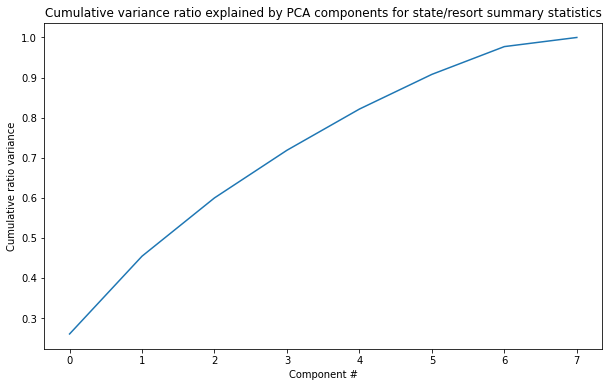

In [92]:
model = PCA()
model.fit(scaledDF)

plt.subplots(figsize=(10, 6))
plt.plot(model.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics')

In [95]:
PCAData = model.transform(scaledDF)

x = PCAData[:,0]
y = PCAData[:,1]

xDF = pd.DataFrame(x, columns = ['X'])
yDF = pd.DataFrame(y, columns= ['Y'])

PCADF = pd.concat([xDF,yDF,df[['C_Class_Flares','M_Class_Flares','X_Class_Flares']]],axis=1)
PCADF.head()

,X,Y,C_Class_Flares,M_Class_Flares,X_Class_Flares
0,-0.817733,1.353994,0,0,0
1,-0.176794,-1.025372,0,0,0
2,0.212882,-0.924024,0,0,0
3,-1.674187,0.972422,0,0,0
4,-1.731836,1.788246,0,0,0


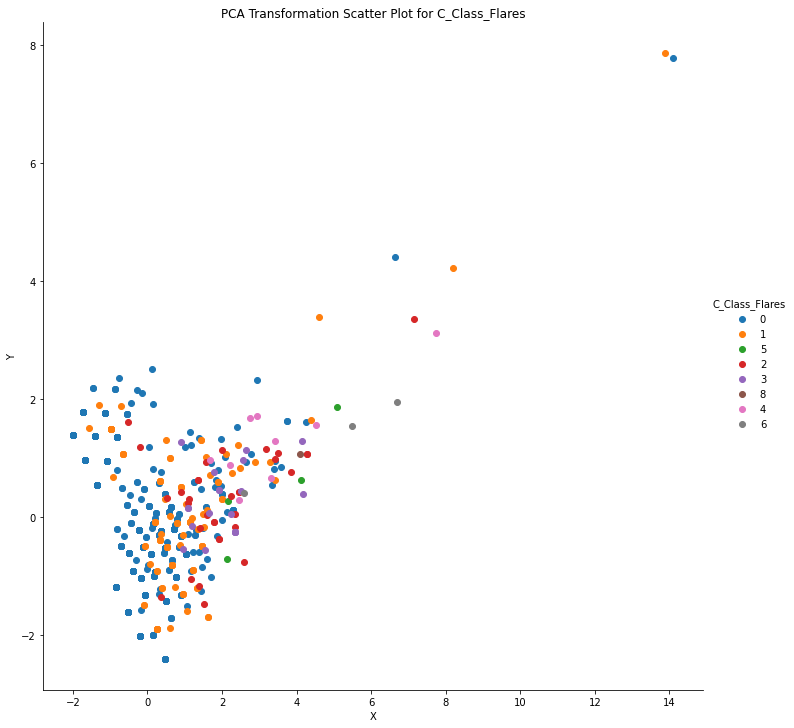

In [118]:
fg = sns.FacetGrid(data=PCADF, hue='C_Class_Flares', hue_order=df.C_Class_Flares.unique(),height = 10)
fg.map(plt.scatter, 'X', 'Y').add_legend()
plt.title('PCA Transformation Scatter Plot for C_Class_Flares')
plt.show()

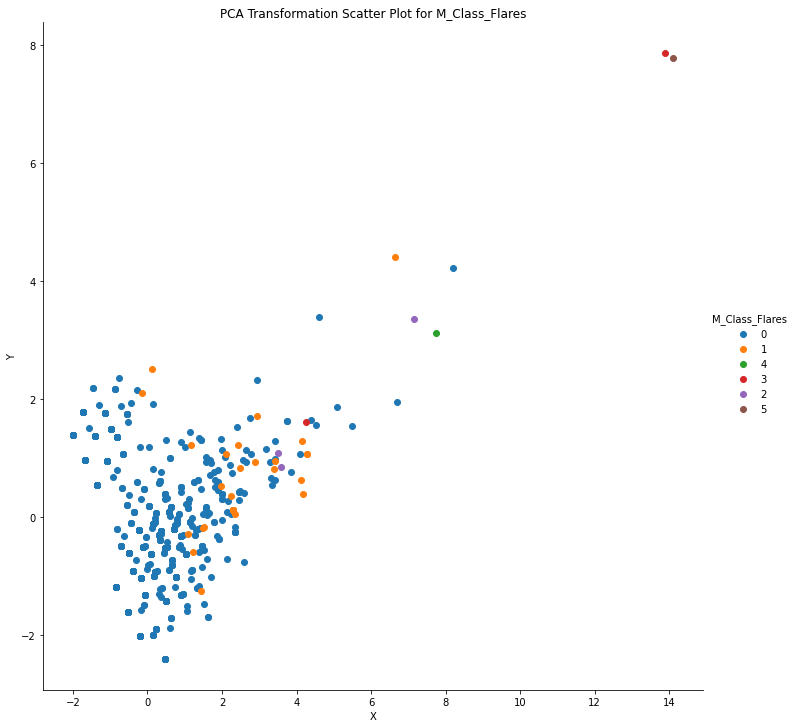

In [120]:
fg = sns.FacetGrid(data=PCADF, hue='M_Class_Flares', hue_order=df.M_Class_Flares.unique(),height = 10)
fg.map(plt.scatter, 'X', 'Y').add_legend()
plt.title('PCA Transformation Scatter Plot for M_Class_Flares')
plt.show()

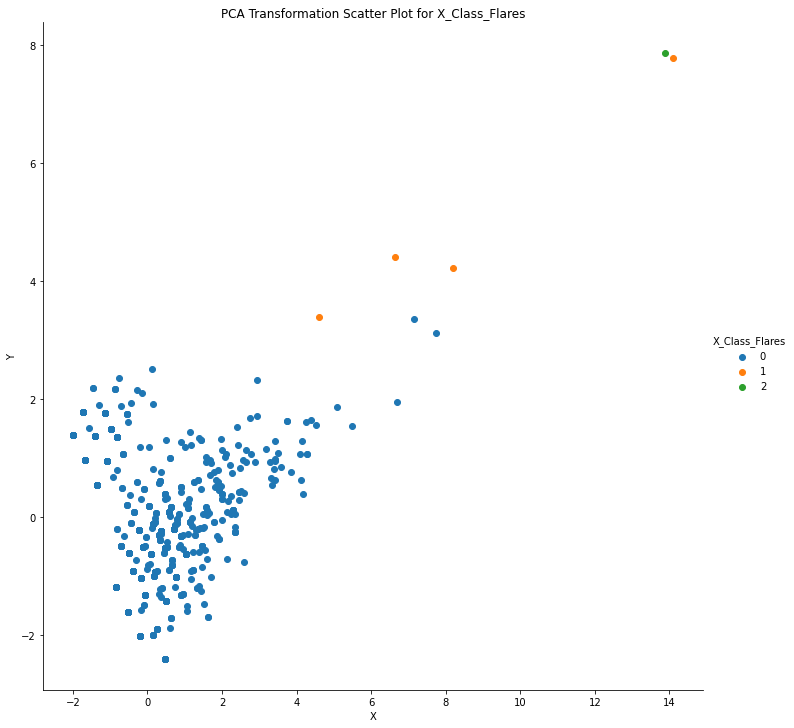

In [119]:
fg = sns.FacetGrid(data=PCADF, hue='X_Class_Flares', hue_order=df.X_Class_Flares.unique(),height = 10)
fg.map(plt.scatter, 'X', 'Y').add_legend()
plt.title('PCA Transformation Scatter Plot for X_Class_Flares')
plt.show()

We perform a quick PCA analysis to see if there's anything we can find visually in our data. We first start by removing the non-linear data(Binary) and then scale and perform our PCA transofrmation. Looking at the variance each feature provides, it doesn't seem like any feature contributes to a large amount of the variance and that we should keep all the features. Looking at a scatter plot for each class, we don't recognize any patterns. The data seems to be all jumbled together and no clusters appear with a coloring on the values of each class.

### 3.6 Conclusion

After looking at our data, we see a lot of variability in our first three columns. These features may be very important to our model in determining the number of solar flares that occur for the classes. We saw a linear relationship between M_Class_Flares and X_Class_Flares, which are two of our target variables. We also saw relationships with C_Class_Flares with Spot_Distribution and Largest_Spot_Size. We see our M_Class_Flares and X_Class_Flares have very scarce data that leans heavily towards no flares occurring and this may be an issue that we need to look out for when working with our models.